<a href="https://colab.research.google.com/github/maxGrigorenko/DistributionClassifier/blob/maxGrigorenko%2Ffirst_part/src/experiments_first_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация распределений. Первая часть проекта
## 2. Исследовение числовых характеристик графов при фиксированных параметрах распределений


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product


from graph_common_functions import *
from distibution_functions import *

In [2]:
sigma = 1
beta = (1/2) ** 0.5

In [19]:
def plot_n(begin_n, end_n, graph_type, step_n=1, number_of_experiments=5, k=3, d=0.1):

    normal_dominating_number_arr = []
    normal_delta_arr = []
    laplace_dominating_number_arr = []
    laplace_delta_arr = []
    n_arr = range(begin_n, end_n, step_n)
    for n in tqdm(n_arr):
        dominating_number, delta = avg_chars(number_of_experiments=number_of_experiments, n=n, graph_type=graph_type,
                                             distribution='normal', sigma=sigma, beta=beta, k=k, d=d)
        normal_dominating_number_arr.append(dominating_number)
        normal_delta_arr.append(delta)

        dominating_number, delta = avg_chars(number_of_experiments=number_of_experiments, n=n, graph_type=graph_type,
                                             distribution='laplace', sigma=sigma, beta=beta, k=k, d=d)
        laplace_dominating_number_arr.append(dominating_number)
        laplace_delta_arr.append(delta)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f"Compare normal and laplace distributions", fontsize=14, y=1.05)
    ax1.plot(n_arr, normal_dominating_number_arr, color='skyblue', label="normal")
    ax1.plot(n_arr, laplace_dominating_number_arr, color='orange', label="laplace")
    ax1.legend()
    ax1.set_title(f'{graph_type} graph dominating number from different sample sizes')
    ax1.set_xlabel('sample size')
    ax1.set_ylabel('dominating number')

    ax2.plot(n_arr, normal_delta_arr, color='skyblue', label="normal")
    ax2.plot(n_arr, laplace_delta_arr, color='orange', label="laplace")
    ax2.set_title(f'{graph_type} graph delta from different sample sizes')
    ax2.set_xlabel('sample size')
    ax2.set_ylabel('delta')
    ax2.legend()

    plt.tight_layout()
    plt.show()


100%|██████████| 19/19 [01:14<00:00,  3.93s/it]


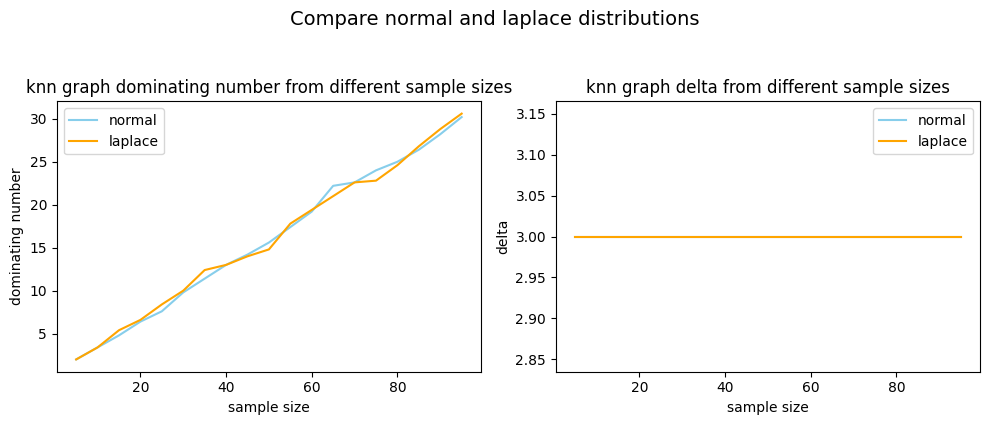

In [20]:
plot_n(begin_n=5, end_n=100, step_n=5, graph_type="knn", k=3)

Различий практически не видно, вероятно, при большем числе эксериментов графики будут еще больше совпадать.

100%|██████████| 19/19 [09:22<00:00, 29.63s/it]


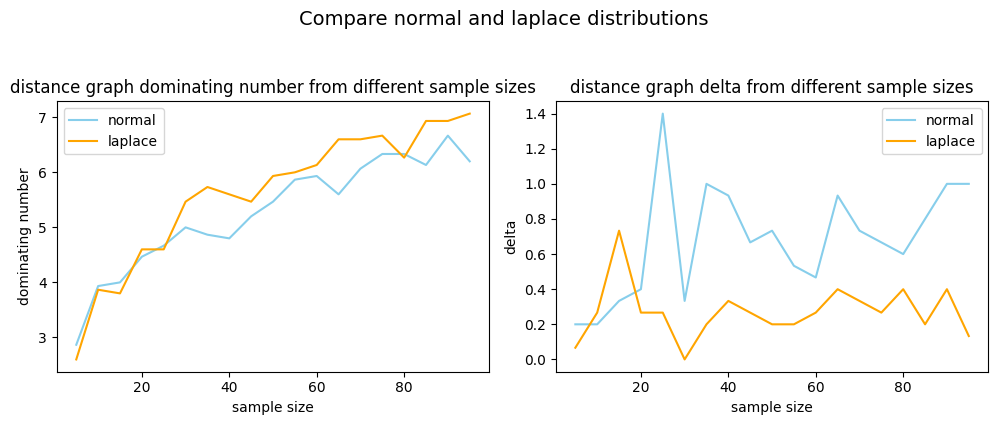

In [22]:
plot_n(begin_n=5, end_n=100, step_n=5, graph_type="distance", d=0.5, number_of_experiments=15)

По графикам видно, что в среднем у графа из распределения Лапласа доминирующее число больше, а минимальная степь - меньше.